Exploration
===

1. df summary
2. plot strain response variation
3. found there's a pattern in the strain response
4. plot strain response against hour for each day

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

sns.set_style('white')

df = pd.read_pickle('data/all-df.p')

In [2]:
# Size of df

df.shape

(893, 198)

In [3]:
# df data types

df.dtypes.unique()

array([dtype('float64')], dtype=object)

In [4]:
df.describe()

,A-1-E-T-TF_Max,A-1-E-T-TF_Min,A-1-E-T-TF_RMS,A-10-E-TW-SF_Max,A-10-E-TW-SF_Min,A-10-E-TW-SF_RMS,A-2-E-T-TF_Max,A-2-E-T-TF_Min,A-2-E-T-TF_RMS,A-3-E-T-TF_Max,...,T-10-E-TW-SF_Min,T-10-E-TW-WB_Average,T-10-E-TW-WB_Max,T-10-E-TW-WB_Min,T-9-E-TW-SF_Average,T-9-E-TW-SF_Max,T-9-E-TW-SF_Min,T-9-E-TW-WB_Average,T-9-E-TW-WB_Max,T-9-E-TW-WB_Min
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,...,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000
mean,0.000703,-0.004788,0.002361,0.002839,-0.004537,0.001029,0.004415,-0.005508,0.001281,0.005358,...,-0.059204,0.052994,0.220468,-0.112316,0.020966,0.086069,-0.044738,0.030371,0.141204,-0.076436
std,0.002462,0.003565,0.002381,0.003608,0.003555,0.000450,0.033051,0.004812,0.001167,0.031019,...,0.126784,0.034658,0.188019,0.160344,0.019085,0.065610,0.052202,0.007504,0.157998,0.145735
min,-0.005498,-0.016052,0.000098,-0.000769,-0.024194,0.000342,-0.001335,-0.095004,0.000071,-0.001768,...,-0.753460,0.008984,0.014422,-1.014312,-0.006033,0.000189,-0.419905,0.014241,0.021706,-0.788185
25%,-0.000957,-0.007629,0.000468,0.000585,-0.005254,0.000754,0.001371,-0.007617,0.000403,0.002469,...,-0.057905,0.020966,0.089483,-0.106817,0.002826,0.030951,-0.067434,0.024343,0.054603,-0.065684
50%,0.001301,-0.004180,0.000947,0.001558,-0.003190,0.000918,0.002359,-0.004604,0.000725,0.003557,...,-0.006017,0.042256,0.161694,-0.045293,0.018277,0.072408,-0.023644,0.030119,0.080075,-0.015971
75%,0.002142,-0.001589,0.004148,0.003152,-0.002248,0.001231,0.004343,-0.002454,0.001915,0.005257,...,0.014152,0.082512,0.264739,-0.019824,0.037100,0.127210,-0.011455,0.035275,0.131663,0.002597
max,0.008179,0.000478,0.007660,0.018818,-0.000533,0.003497,0.906455,-0.000494,0.007247,0.850808,...,0.042537,0.162960,0.971193,0.061560,0.058868,0.411538,0.022568,0.048380,1.034761,0.025311


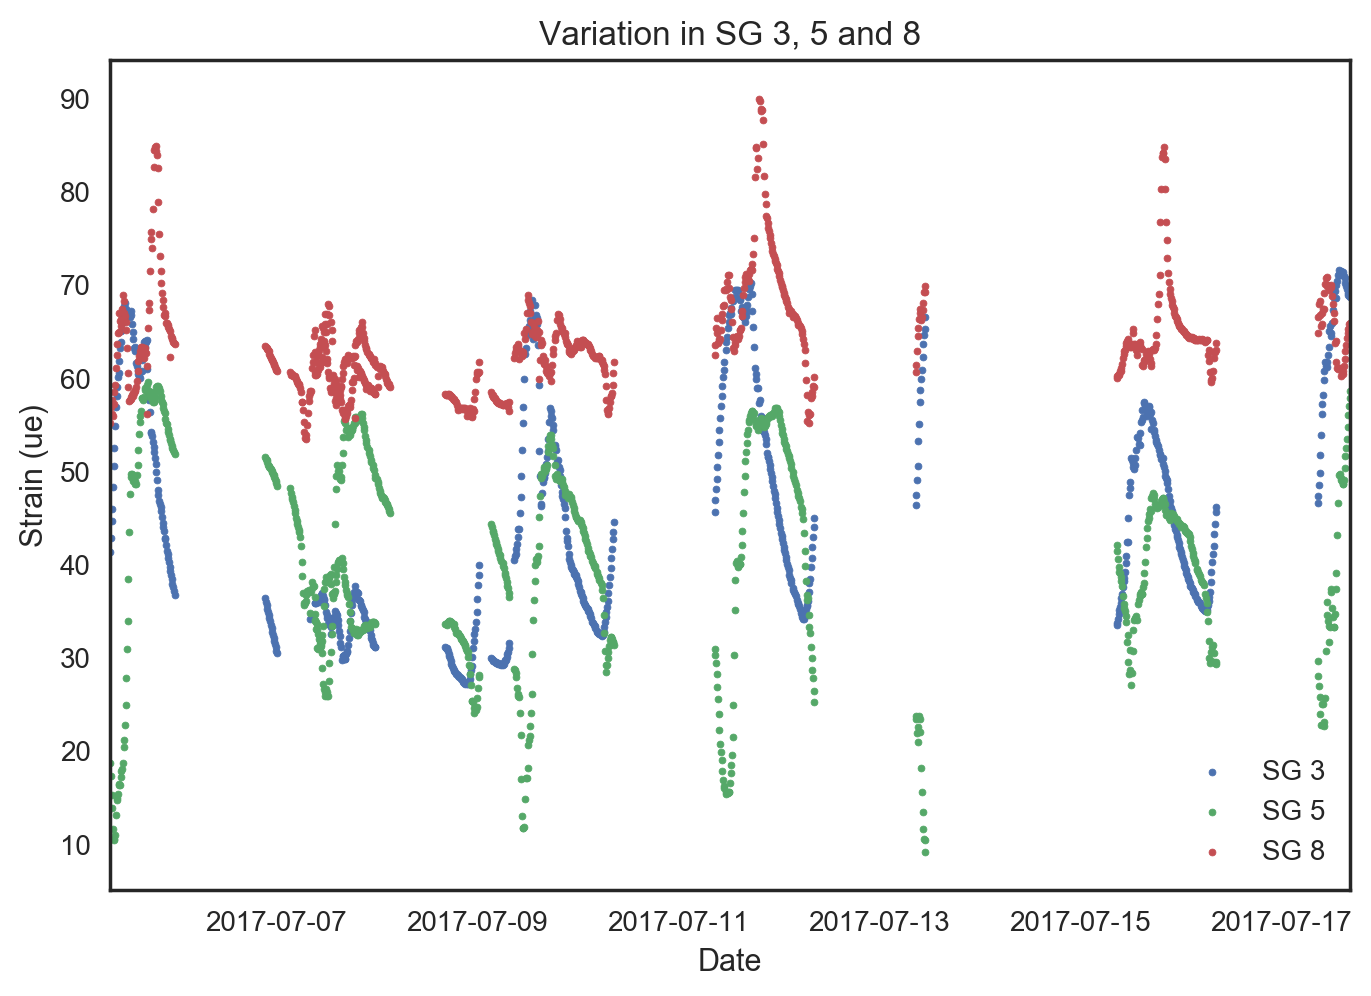

In [5]:
plt.figure(dpi=200)
plt.scatter(x=df.index, y=df['SG-3-E-R-A-D_Average'], s=6)
plt.scatter(x=df.index, y=df['SG-5-E-R-A-D_Average'], s=6)
plt.scatter(x=df.index, y=df['SG-8-E-R-A-D_Average'], s=6)
plt.xlim([df.index.min(), df.index.max()])
# plt.ylim([df['SG-3-E-R-A-D_Average'].max(), df['SG-3-E-R-A-D_Average'].min()])
title = 'Variation in SG 3, 5 and 8'
plt.title(title)
plt.xlabel('Date')
plt.ylabel('Strain (ue)')
plt.legend(['SG 3', 'SG 5', 'SG 8'], loc=4)
plt.savefig(title)

In [6]:
# groupby a day
df_day = df.groupby(df.index.day).mean()

In [7]:
# grouby an hour
df_hour = df.groupby(df.index.hour).mean()

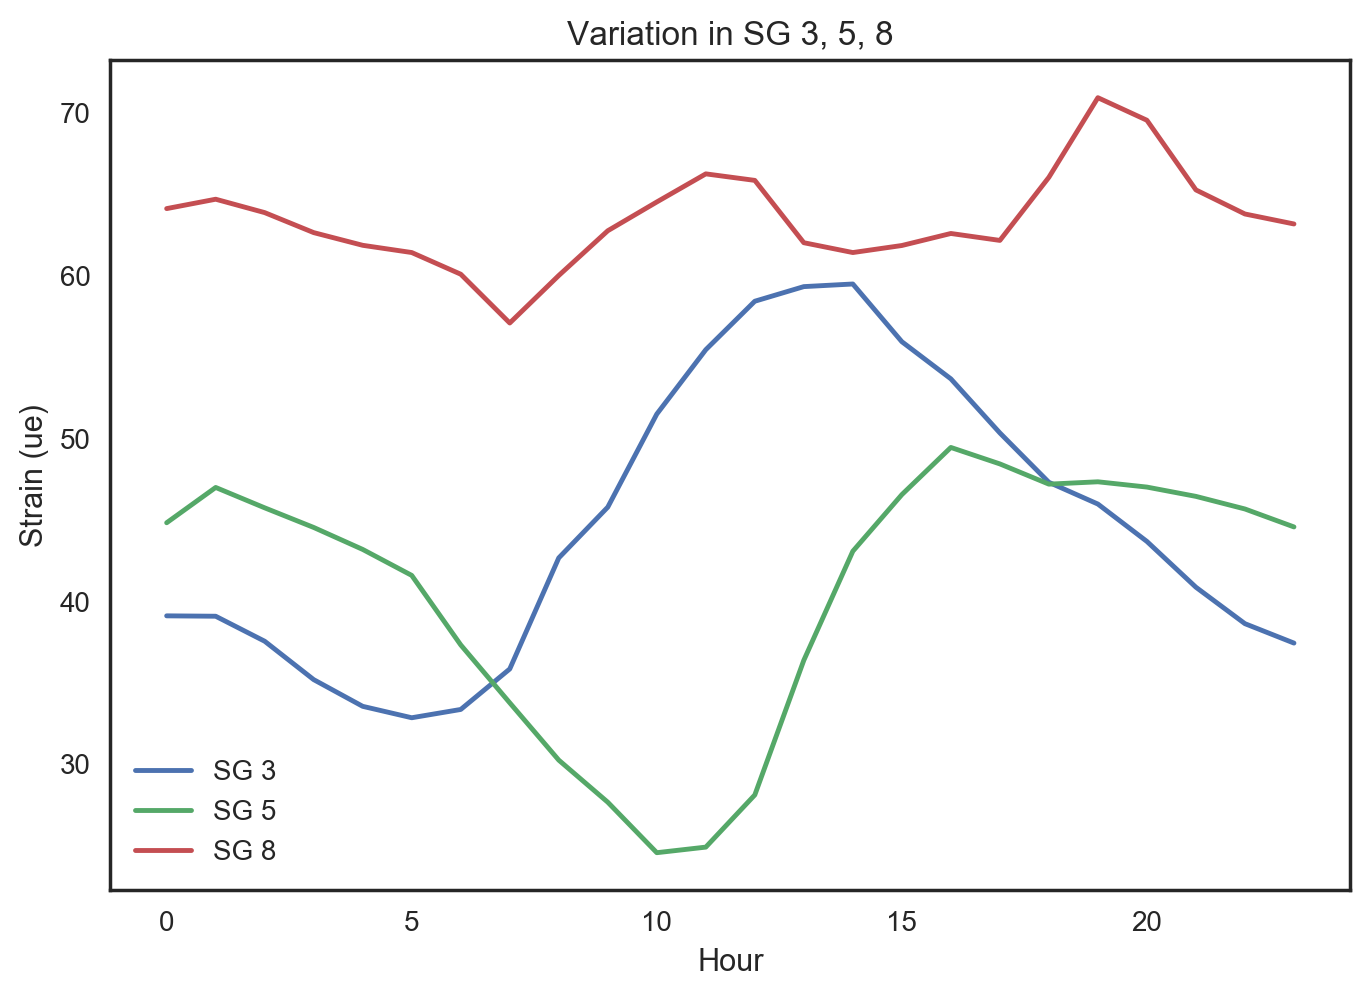

In [8]:
plt.figure(dpi=200)
plt.plot(df_hour.index, df_hour['SG-3-E-R-A-D_Average'], '-')
plt.plot(df_hour.index, df_hour['SG-5-E-R-A-D_Average'], '-')
plt.plot(df_hour.index, df_hour['SG-8-E-R-A-D_Average'], '-')
title = 'Variation in SG 3, 5, 8'
plt.title(title)
plt.xlabel('Hour')
plt.ylabel('Strain (ue)')
plt.legend(['SG 3', 'SG 5', 'SG 8'])
plt.savefig(title)

In [9]:
df_hour = df.resample('H').mean()

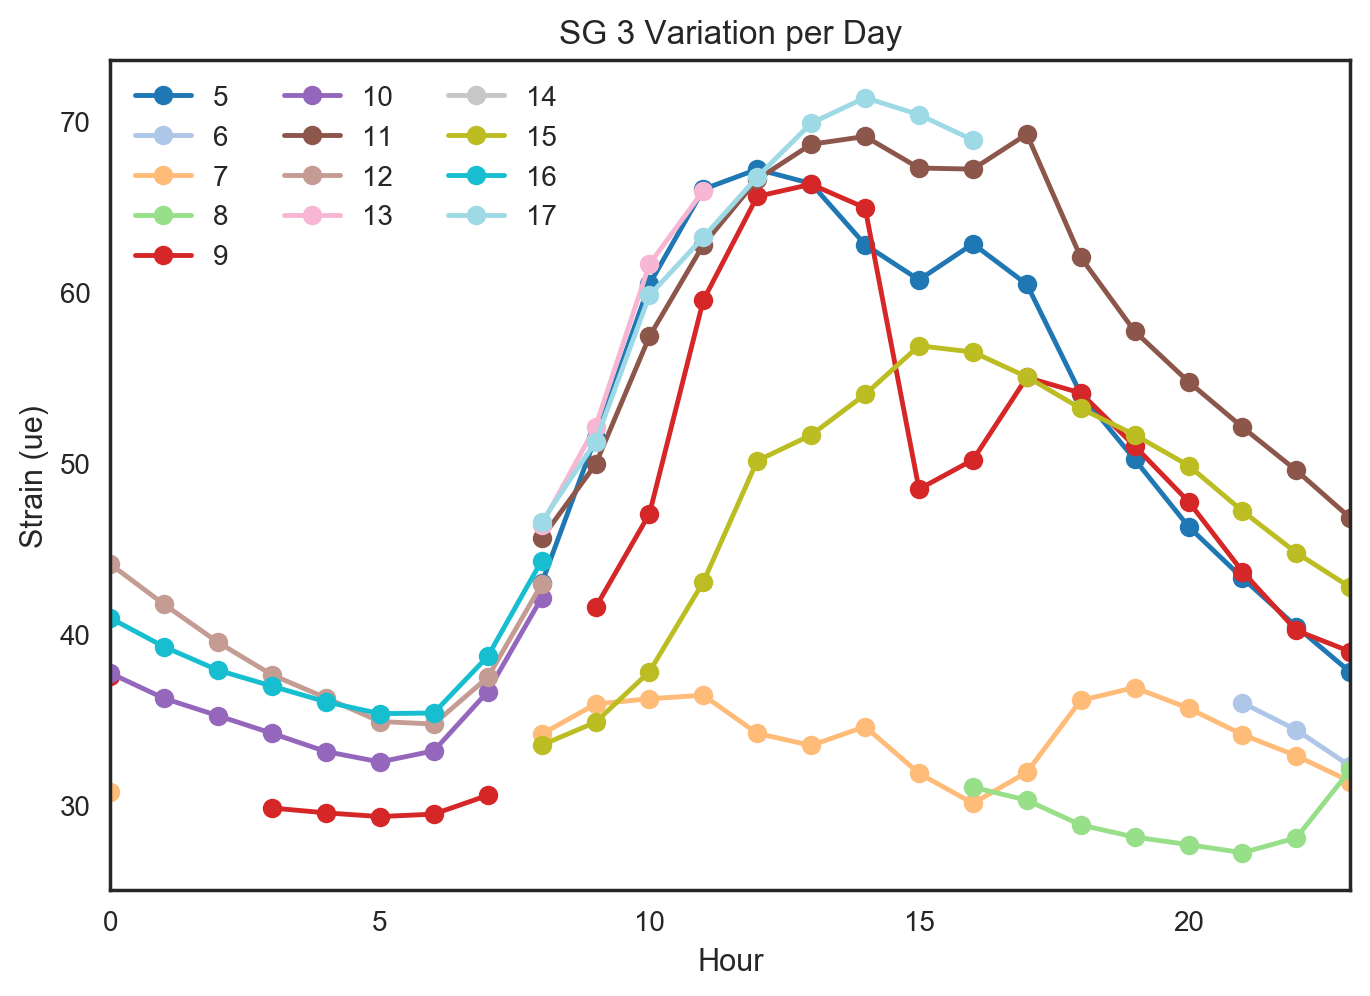

In [10]:
plt.figure(dpi=200)

# iterate colour
x = np.linspace(0, 1, 13)
cmap = plt.get_cmap('tab20')
i = 0

for day in list(df_hour.index.day.unique()):
    df = df_hour[df_hour.index.day == day]
    color = cmap(x[i])
    plt.plot(df.index.hour, df['SG-3-E-R-A-D_Average'], '-o', color=color, label=day)
    i += 1
    
plt.legend(ncol=3)
title = 'SG 3 Variation per Day'
plt.title(title)
plt.xlabel('Hour')
plt.ylabel('Strain (ue)')
plt.xlim([0, 23])
plt.savefig(title)

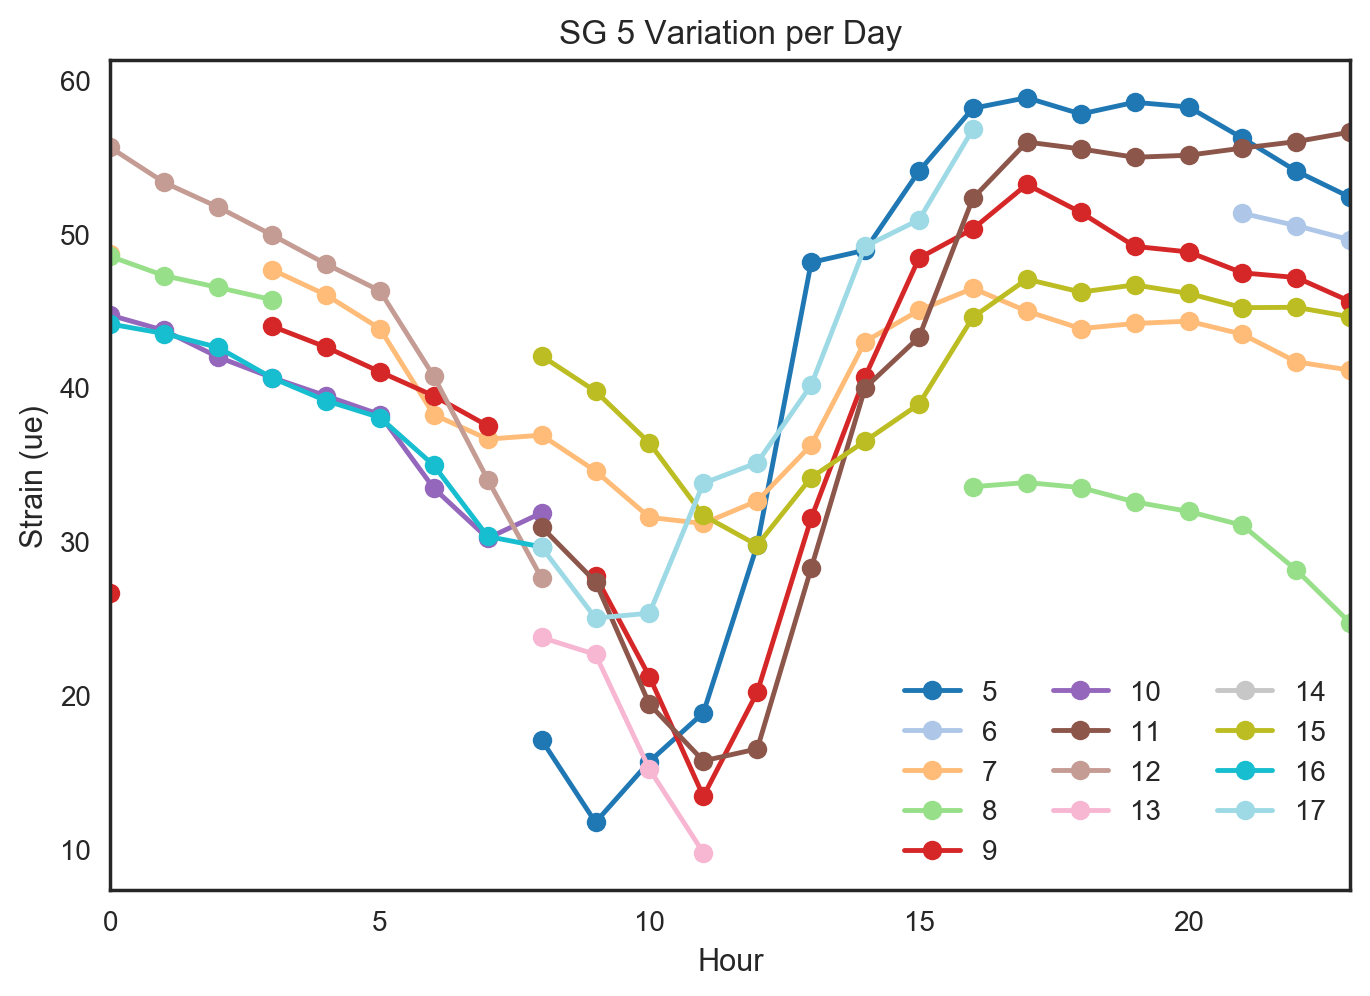

In [11]:
plt.figure(dpi=200)
plt_day = []
plt_legend = []

# iterate colour
x = np.linspace(0, 1, 13)
cmap = plt.get_cmap('tab20')
i=0

for day in list(df_hour.index.day.unique()):
    df = df_hour[df_hour.index.day == day]
    color = cmap(x[i])
    plt.plot(df.index.hour, df['SG-5-E-R-A-D_Average'], '-o', color=color, label=day)
    i += 1
    
plt.legend(ncol=3)
title = 'SG 5 Variation per Day'
plt.title(title)
plt.xlabel('Hour')
plt.ylabel('Strain (ue)')
plt.xlim([0, 23])
plt.savefig(title)

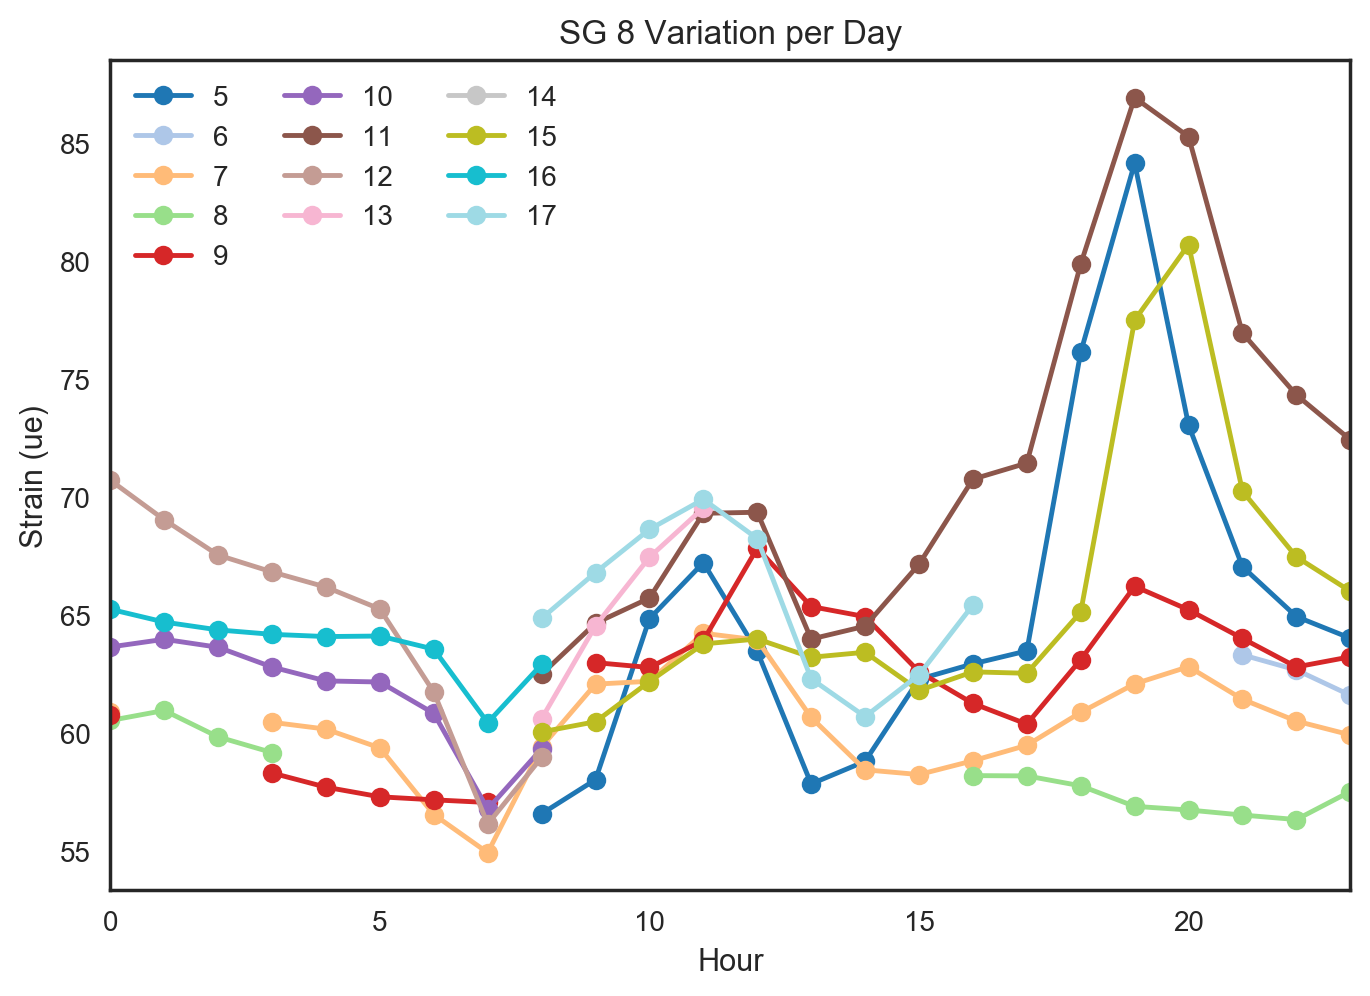

In [12]:
plt.figure(dpi=200)
plt_day = []
plt_legend = []

# iterate colour
x = np.linspace(0, 1, 13)
cmap = plt.get_cmap('tab20')
i=0

for day in list(df_hour.index.day.unique()):
    df = df_hour[df_hour.index.day == day]
    color = cmap(x[i])
    plt.plot(df.index.hour, df['SG-8-E-R-A-D_Average'], '-o', color=color, label=day)
    i += 1
    
plt.legend(ncol=3)
title = 'SG 8 Variation per Day'
plt.title(title)
plt.xlabel('Hour')
plt.ylabel('Strain (ue)')
plt.xlim([0, 23])
plt.savefig(title)

In [13]:
# TODO: write plot (hour) as a function with df column input

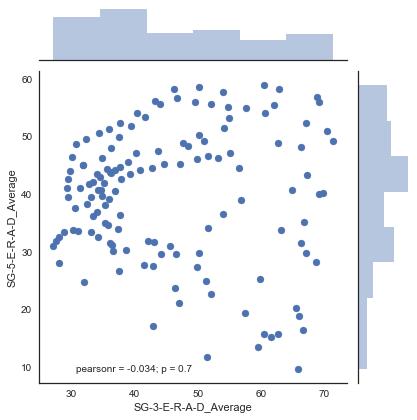

In [14]:
sns.jointplot(df_hour['SG-3-E-R-A-D_Average'], df_hour['SG-5-E-R-A-D_Average'])

In [15]:
# Created a module to plot variation per day

import plots

df = pd.read_pickle('all-df.p')
plots.variation_per_day(df, 'SG-8-E-R-A-D_Average')